In [ ]:

# Dependencies and Setup
import pandas as pd
import os
import matplotlib.pyplot as plt
import requests
from config import api_key
import random 
import numpy as np

# File to Load 
city_data_to_load = "Resources/worldcities.csv"

# Read world cities and their lat and long and put them into Panda dataframe
world_city_df = pd.read_csv(city_data_to_load)


# Create column and determine the hemisphere of each city 
world_city_df['Hemisphere'] = np.where(world_city_df['Latitude'] >= 0, 'N','S')

# set up additional columns to hold weather information
world_city_df['Processed'] = 'N'
world_city_df['Temperature (F)'] = 0
world_city_df['Humidity (%)'] = 0
world_city_df['Cloudiness (%)'] = 0
world_city_df['Wind Speed (mph)'] = 0

world_city_df

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

i = 0
# We will process 600 records 
while (i < 600): 
    # Get a random number ranging from 0 to the total record from dataframe 
    n = random.randint(0,len(world_city_df)) 
    # Assign the cityname for that particular random row selected 
    cityName = world_city_df.iloc[n,world_city_df.columns.get_loc("City")]
    # Check to see if the city has already been processed with the weather API info 
    if world_city_df.iloc[n,world_city_df.columns.get_loc("Processed")] == "N":
        # Call the weather api with for the given city 
        response = requests.get(query_url + cityName).json()
        
        # Ensure the city is found from the weather api web site then assign those columns with values from the weather api site 
        if requests.head(query_url + cityName).status_code==200:
            print(f"City selected - Number = {n} and name is {cityName}")
            world_city_df.iloc[n,world_city_df.columns.get_loc('Temperature (F)')] = response['main']['temp']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Humidity (%)')] = response['main']['humidity']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Cloudiness (%)')] = response['clouds']['all']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Wind Speed (mph)')] = response['wind']['speed']
            world_city_df.iloc[n,world_city_df.columns.get_loc("Processed")] = "Y"
            # Increment the count
            i = i + 1
        


 selected - Number = 38679 and name is udachnyy
City selected - Number = 24614 and name is temixco
City selected - Number = 2569 and name is cachoeirinha
City selected - Number = 39454 and name is nassjo
City selected - Number = 42180 and name is van buren
City selected - Number = 2823 and name is delmiro gouveia
City selected - Number = 29283 and name is okiot
City selected - Number = 35797 and name is ekhabi
City selected - Number = 9700 and name is sulzbach-rosenberg
City selected - Number = 3598 and name is patos
City selected - Number = 5356 and name is gossau
City selected - Number = 34991 and name is senta
City selected - Number = 14959 and name is la estancia
City selected - Number = 8384 and name is veverska bityska
City selected - Number = 27373 and name is bato
City selected - Number = 31252 and name is opole lubelskie
City selected - Number = 15268 and name is krk
City selected - Number = 5840 and name is bayan
City selected - Number = 36506 and name is kotlas
City selected

Correlation coefficient=-0.8115280776215251 calculated between temperatures and latitudes of cities.
Linear regression Line formula is y = -0.85x + 77.22
As -0.8115280776215251 is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitudes of the cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.


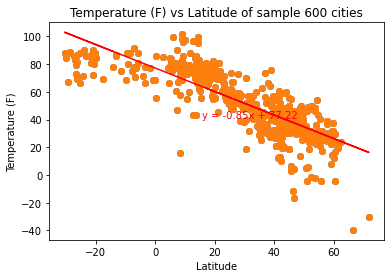

In [22]:
import scipy.stats as st
from scipy.stats import linregress
# Only want those processed 600 records
scatter = world_city_df.loc[world_city_df['Processed'] == "Y"]
x_values =  scatter["Latitude"]
y_values = scatter['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitudes of the cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title('Temperature (F) vs Latitude of sample 600 cities')
plt.savefig("Images/Scatter-Temperature (F) vs Latitude of sample 600 cities.png")
plt.show()

Correlation coefficient=0.3784549294908756 calculated between Humidity (%) and latitudes of cities.
Linear regression Line formula is y = 0.36x + 61.44
As 0.3784549294908756 is below 0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of the cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


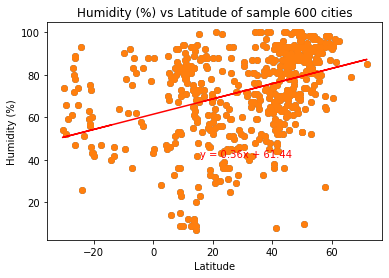

In [23]:
x_values = scatter["Latitude"]
y_values = scatter['Humidity (%)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Humidity (%) and latitudes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is below 0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of the cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Humidity (%) vs Latitude of sample 600 cities')
plt.savefig("Images/Humidity (%) vs Latitude of sample 600 cities.png")
plt.show()

Correlation coefficient=0.17037308466180495 calculated between Cloudiness (%) and latitudes of cities.
Linear regression Line formula is y = 0.3x + 50.67
As 0.17037308466180495 is below 0.5 which indicates a weak or no relationship between cloudiness percentage and the latitudes of the cities. This scatter plot has NOT provided any evidence or replationship between cloudiness percentage and latitudes of those cities used in the sample data.


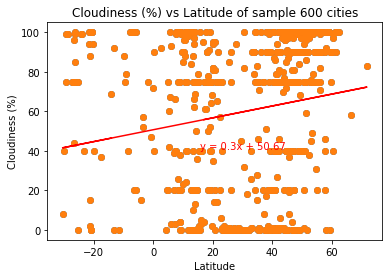

In [24]:
x_values =  scatter["Latitude"]
y_values = scatter['Cloudiness (%)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitudes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is below 0.5 which indicates a weak or no relationship between cloudiness percentage and the latitudes of the cities. This scatter plot has NOT provided any evidence or replationship between cloudiness percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Cloudiness (%) vs Latitude of sample 600 cities')
plt.savefig("Images/Cloudiness (%) vs Latitude of sample 600 cities.png")
plt.show()

Correlation coefficient=0.04577181312747266 calculated between Wind Speed and latitudes of cities.
Linear regression Line formula is y = 0.01x + 7.17
As 0.04577181312747266 is very close to 0 which indicates a weak or no relationship between wind speed and the latitudes of the cities. This scatter plot has NOT provided any evidence or replationship between wind speed and latitudes of those cities used in the sample data.


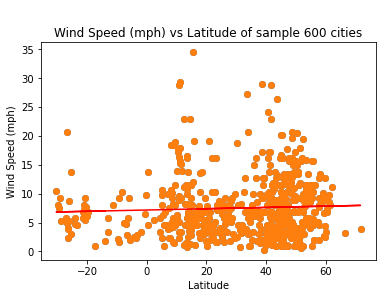

In [25]:
x_values =  scatter["Latitude"]
y_values  = scatter['Wind Speed (mph)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed and latitudes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is very close to 0 which indicates a weak or no relationship between wind speed and the latitudes of the cities. This scatter plot has NOT provided any evidence or replationship between wind speed and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Wind Speed (mph) vs Latitude of sample 600 cities')
plt.savefig("Images/Wind speed (mph) vs Latitude of sample 600 cities.png")
plt.show()

In [26]:
# Need to divide between Northern and Southern hemisphere cities into different datafreame for further evalution
# More Northern cities than south 
scatterSouth = scatter.loc[scatter['Hemisphere'] == "S"]
scatterNorth = scatter.loc[scatter['Hemisphere'] == "N"]
len(scatterSouth.index)
len(scatterNorth.index)


549

Correlation coefficient=-0.8199188146484405 calculated between temperatures and latitudes of Northern Hemisphere cities.
Linear regression Line formula is y = -1.1x + 87.33
As -0.8199188146484405 is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitudes of Northern Hemisphere cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.


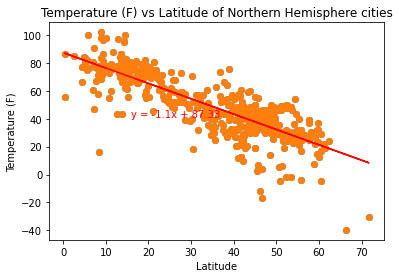

In [27]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitudes of Northern Hemisphere cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title('Temperature (F) vs Latitude of Northern Hemisphere cities')
plt.savefig("Images/Temperature (F) vs Latitude of Northern Hemisphere cities.png")
plt.show()

Correlation coefficient=-0.2596181592070335 calculated between temperatures and latitudes of Southern Hemisphere cities.
Linear regression Line formula is y = -0.21x + 76.34
As -0.2596181592070335 is between 0 and -0.5 which indicates a weak or no relationship between temperatures and the latitudes of Southern Hemisphere cities. That might be because of the lack and the limited number of southern hemisphere cities found. Anyhow, this scatter plot has NOT provided any evidence or relationship between temperature and latitude of cities used in the sample data.


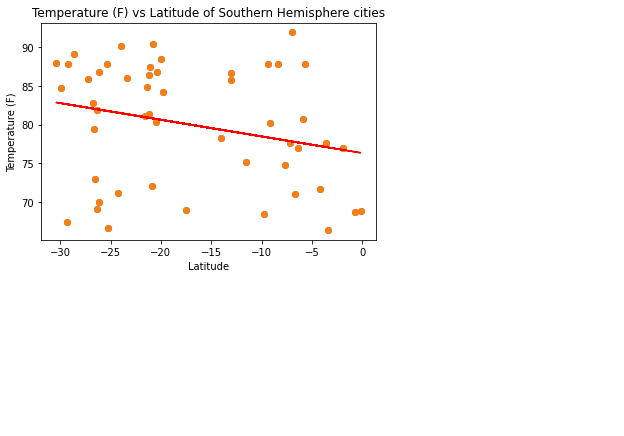

In [28]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between temperatures and the latitudes of Southern Hemisphere cities. That might be because of the lack and the limited number of southern hemisphere cities found. Anyhow, this scatter plot has NOT provided any evidence or relationship between temperature and latitude of cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title('Temperature (F) vs Latitude of Southern Hemisphere cities')
plt.savefig("Images/Temperature (F) vs Latitude of Southern Hemisphere cities.png")
plt.show()

Correlation coefficient=0.41890104284255014 calculated between temperatures and latitudes of Northern Hemisphere cities.
Linear regression Line formula is y = 0.54x + 54.2
As 0.41890104284255014 is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


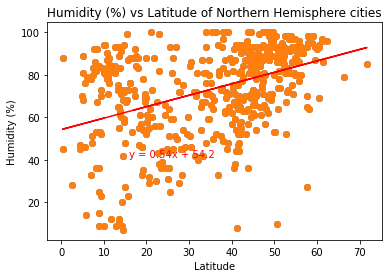

In [29]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Humidity (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Humidity (%) vs Latitude of Northern Hemisphere cities')
plt.savefig("Images/Humidity (%) vs Latitude of Northern Hemisphere cities.png")
plt.show()

Correlation coefficient=0.07635865270748897 calculated between temperatures and latitudes of Southern Hemisphere cities.
Linear regression Line formula is y = 0.14x + 66.47
As 0.07635865270748897 is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


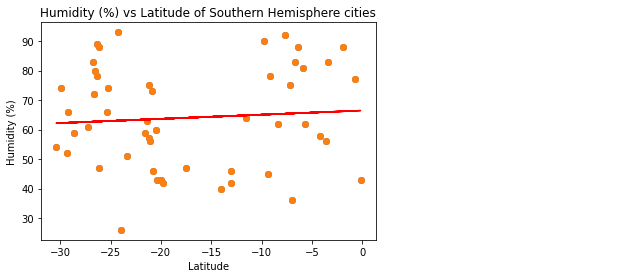

In [30]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Humidity (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitudes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Humidity (%) vs Latitude of Southern Hemisphere cities')
plt.savefig("Images/Humidity (%) vs Latitude of Southern Hemisphere cities.png")
plt.show()

Correlation coefficient=0.2831232372876349 calculated between Cloudiness (%) and latitudes of Northern Hemisphere cities.
Linear regression Line formula is y = 0.68x + 35.48
As 0.2831232372876349 is betweenn 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.


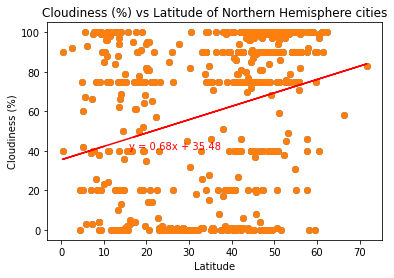

In [31]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Cloudiness (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitudes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Cloudiness (%) vs Latitude of Northern Hemisphere cities')
plt.savefig("Images/Cloudiness (%) vs Latitude of Northern Hemisphere cities.png")
plt.show()

Correlation coefficient=-0.066843108986678 calculated between Cloudiness (%) and latitudes of Southern Hemisphere cities.
Linear regression Line formula is y = -0.26x + 59.38
As -0.066843108986678 is between 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.


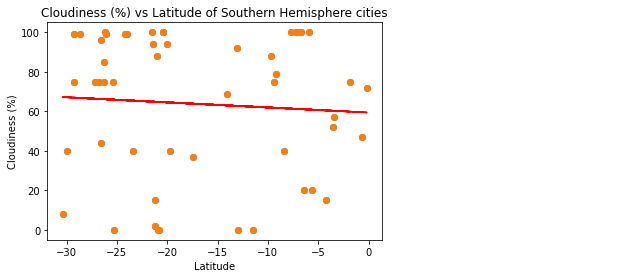

In [32]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Cloudiness (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitudes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Cloudiness (%) vs Latitude of Southern Hemisphere cities')
plt.savefig("Images/Cloudiness (%) vs Latitude of Southern Hemisphere cities.png")
plt.show()

Correlation coefficient=-0.009152853528543139 calculated between Wind Speed (mph) and latitudes of Northern Hemisphere cities.
Linear regression Line formula is y = -0.0x + 7.76
As -0.009152853528543139 is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.


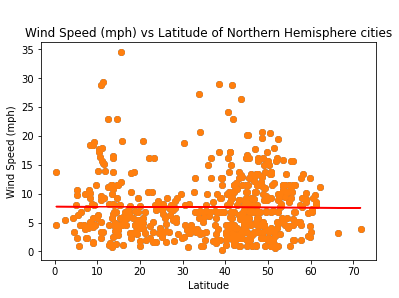

In [33]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Wind Speed (mph)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed (mph) and latitudes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitudes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Wind Speed (mph) vs Latitude of Northern Hemisphere cities')
plt.savefig("Images/Wind Speed (mph) vs Latitude of Northern Hemisphere cities.png")
plt.show()

Correlation coefficient=-0.28879781798476356 calculated between Wind Speed (mph) and latitudes of Southern Hemisphere cities.
Linear regression Line formula is y = -0.11x + 4.22
As -0.28879781798476356 is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.


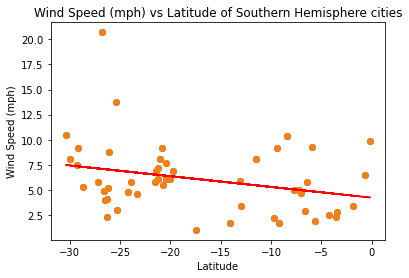

In [34]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Wind Speed (mph)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed (mph) and latitudes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitudes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Wind Speed (mph) vs Latitude of Southern Hemisphere cities')
plt.savefig("Images/Wind Speed (mph) vs Latitude of Southern Hemisphere cities.png")
plt.show()

In [35]:
  # Save dataframe to cvs so part can be used.
scatter.to_csv('Resources/cityWeatherResult.csv', index=False)